In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def load_dataset():
    # H5py store multiple arrays in structured form currently it is storing 3 datasets train , test and list of classes.
    # shape of train set stored in file (m, height, width, channels)
    # shape of test set stored in file (m , 1)
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(1, 209)


## Shape of X_train_origin is (m , 64 , 64 , 3)
## Shape of Y_train_origin is (1,m)
so when we do X_train_origin[1] it will print the first matrix

y = [1], it's a 'cat' picture.


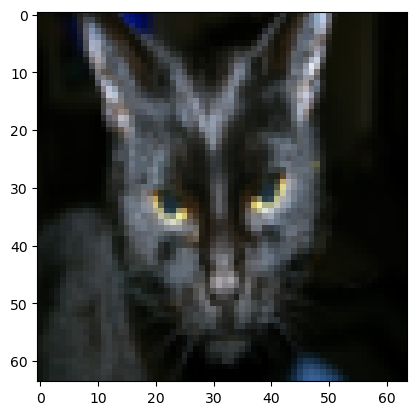

In [6]:
# Example of a picture

plt.imshow(train_set_x_orig[25])
print ("y = " + str(train_set_y[:, 25]) + ", it's a '" + classes[np.squeeze(train_set_y[:, 25])].decode("utf-8") +  "' picture.")

In [7]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
pixels = train_set_x_orig.shape[1] # we can also use 2 here as shape is (m , pixels , pixels , 3)
print(f"Number of training examples : {m_train}")
print(f"Number of testing examples : {m_test}")
print(f"Number of pixels : {pixels}")

Number of training examples : 209
Number of testing examples : 50
Number of pixels : 64


# Converting image matrices to vectors for input

In [8]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test , -1).T

In [9]:
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(12288, 209)
(12288, 50)
(1, 209)
(1, 50)


#### Now our shape of input is (n , m) :-> m is the number of training examples as n is the number of features in each example
#### and shape of out put as defined above is (1 , m)

# Preprocessing

In [10]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

For m examples  and j neurons :
$$Z^{(i)} = W^T X + b \tag{1}$$
$$\hat{Y}^{(i)} = A^{(i)} = sigmoid(Z^{(i)})\tag{2}$$

Given:
- \( X \): Shape `(n, m)`
- \( W \): Shape `(j, n)`
- \( b \): Shape `(1, m)`


j = Number of neurons in current layer<br>
m = Number of training examples<br>
n = Number of features in each example<br>
$$X = W X + b$$

### Steps:
1. \( W X \): Matrix multiplication
   - Shape: `(j, n) * (n, m) = (j, m)`
2. Add \( b \) to \( W^T X \):
   - Broadcasting \( b \) from `(1, m)` to `(j, m)`
   - Result: `(j, m) + (j, m) = (j, m)`

### Final Shape:
$$ X = (j, m) $$

# General Methodology to Build a Neural Network

1. **Define the neural network structure** 
   - Number of input units 
   - Number of hidden units if more then one layer then for each layer
   - Number of output units

2. **Initialize the model's parameters**

3. **Loop** (for each epoch/iteration):
   - **Forward propagation**: Calculate the output of the network.
   - **Compute loss**: Measure the difference between predicted and actual values.
   - **Backward propagation**: Calculate gradients for each parameter.
   - **Update parameters**: Use gradient descent to update the model's parameters.


In [11]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for i in range(1,L):
        parameters[f"W{i}"] = np.random.randn(layer_dims[i] , layer_dims[i-1]) / np.sqrt(layer_dims[i-1])
        parameters[f"b{i}"] = np.zeros((layer_dims[i] , 1))
    return parameters

## Just for testing purpose

In [12]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.12860594  0.61304615 -0.39048323 -0.01062311  0.22782258]
 [-0.13976153  0.27592083 -0.33145799 -0.1703606  -0.53335982]
 [ 1.39838147 -0.87764894 -0.05248865  0.21281336 -0.06707541]
 [ 0.31321932  0.61289097  0.82455691  0.47111979 -0.61036694]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.12228788  0.59428242 -0.35155062 -0.62517344]
 [-0.88298333  0.65807262 -1.12874113  0.96840719]
 [ 0.56064456 -0.7669275   0.43448834 -0.18688702]]
b2 = [[0.]
 [0.]
 [0.]]


# ActivatIon Functions

In [13]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    
    Z = (W @ A) + b
    cache = (A, W, b)
    
    return Z, cache

In [14]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [15]:
def relu(Z):
       
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache

In [16]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):

    Z, linear_cache = linear_forward(A_prev , W , b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

In [17]:

def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A , cache = linear_activation_forward(A_prev , parameters["W" + str(l)] ,  parameters["b" + str(l)] , 'relu')
        caches.append(cache)
    
    A , cache = linear_activation_forward(A , parameters["W" + str(L)] ,  parameters["b" + str(L)] , 'sigmoid')
    caches.append(cache)
          
    return A, caches

In [18]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    cost = np.sum((Y * np.log(AL)) + ((1 - Y)*np.log(1 - AL)))/-m
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

In [19]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

In [20]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [21]:
def sigmoid_backward(dA, cache):    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [22]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA , activation_cache)
        dA_prev , dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA , activation_cache)
        dA_prev , dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [23]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


In [24]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [25]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        AL , caches = L_model_forward(X, parameters)    
        # YOUR CODE ENDS HERE
        
        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(AL, Y)
        # YOUR CODE ENDS HERE
    
        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...    
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, caches)
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
layers_dims = [12288, 20, 7, 5, 1]
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 4000, print_cost = True)

Cost after iteration 0: 0.7717493284237688
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.567047326836611
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.3917469743480535
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.27269984417893856
Cost after iteration 1200: 0.23741853400268131
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463302
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.11382060668633712
Cost after iteration 2100: 0.1078392852

In [30]:
def predict(X, parameters):
    """
    Predict the labels for a given input using the trained parameters.
    """
    A, _ = L_model_forward(X, parameters)  # Forward propagation
    predictions = (A >= 0.5).astype(int)  # Convert probabilities to binary labels
    return A, predictions

In [31]:
def display_predictions(X_orig, Y, predictions, num_images=50):
    """
    Display `num_images` images along with their true and predicted labels in a visually appealing layout.
    """
    # Determine the grid layout (rows and columns)
    rows = int(np.ceil(num_images / 5))
    cols = min(num_images, 5)
    
    indices = np.random.choice(X_orig.shape[0], num_images, replace=False)  # Randomly select images
    plt.figure(figsize=(15, rows * 3))  # Adjust the figure size dynamically

    for i, index in enumerate(indices):
        plt.subplot(rows, cols, i + 1)
        image = X_orig[index]
        plt.imshow(image)
        plt.axis('off')

        # Determine true and predicted labels
        true_label = "Cat" if Y[0, index] == 1 else "Not Cat"
        pred_label = "Cat" if predictions[0, index] == 1 else "Not Cat"

        # Color-coded title based on correctness
        if true_label == pred_label:
            title_color = "green"  # Correct prediction
        else:
            title_color = "red"  # Incorrect prediction

        plt.title(f"P: {pred_label}\nT: {true_label}", fontsize=10, color=title_color)

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

(12288, 50)
(1, 50)
Predicted probabilities: [[0.99963286 0.99756858 0.9655105  0.89181926 0.9888748  0.81515285
  0.59770639 0.99982757 0.99425372 0.98575855 0.99903538 0.75298648
  0.99672508 0.99999062 0.03818049 0.9988414  0.13084732 0.99654375
  0.74615512 0.05419631 0.9972656  0.0920022  0.03818049 0.81742732
  0.94009978 0.9971013  0.98258562 0.03818049 0.13662681 0.99918515
  0.95298523 0.99998667 0.9976047  0.98440596 0.85607029 0.03818049
  0.04147343 0.914143   0.92884115 0.03818049 0.97841931 0.98042672
  0.70640894 0.03818049 0.97771885 0.99954022 0.35133481 0.99999938
  0.36928353 0.04432262]]


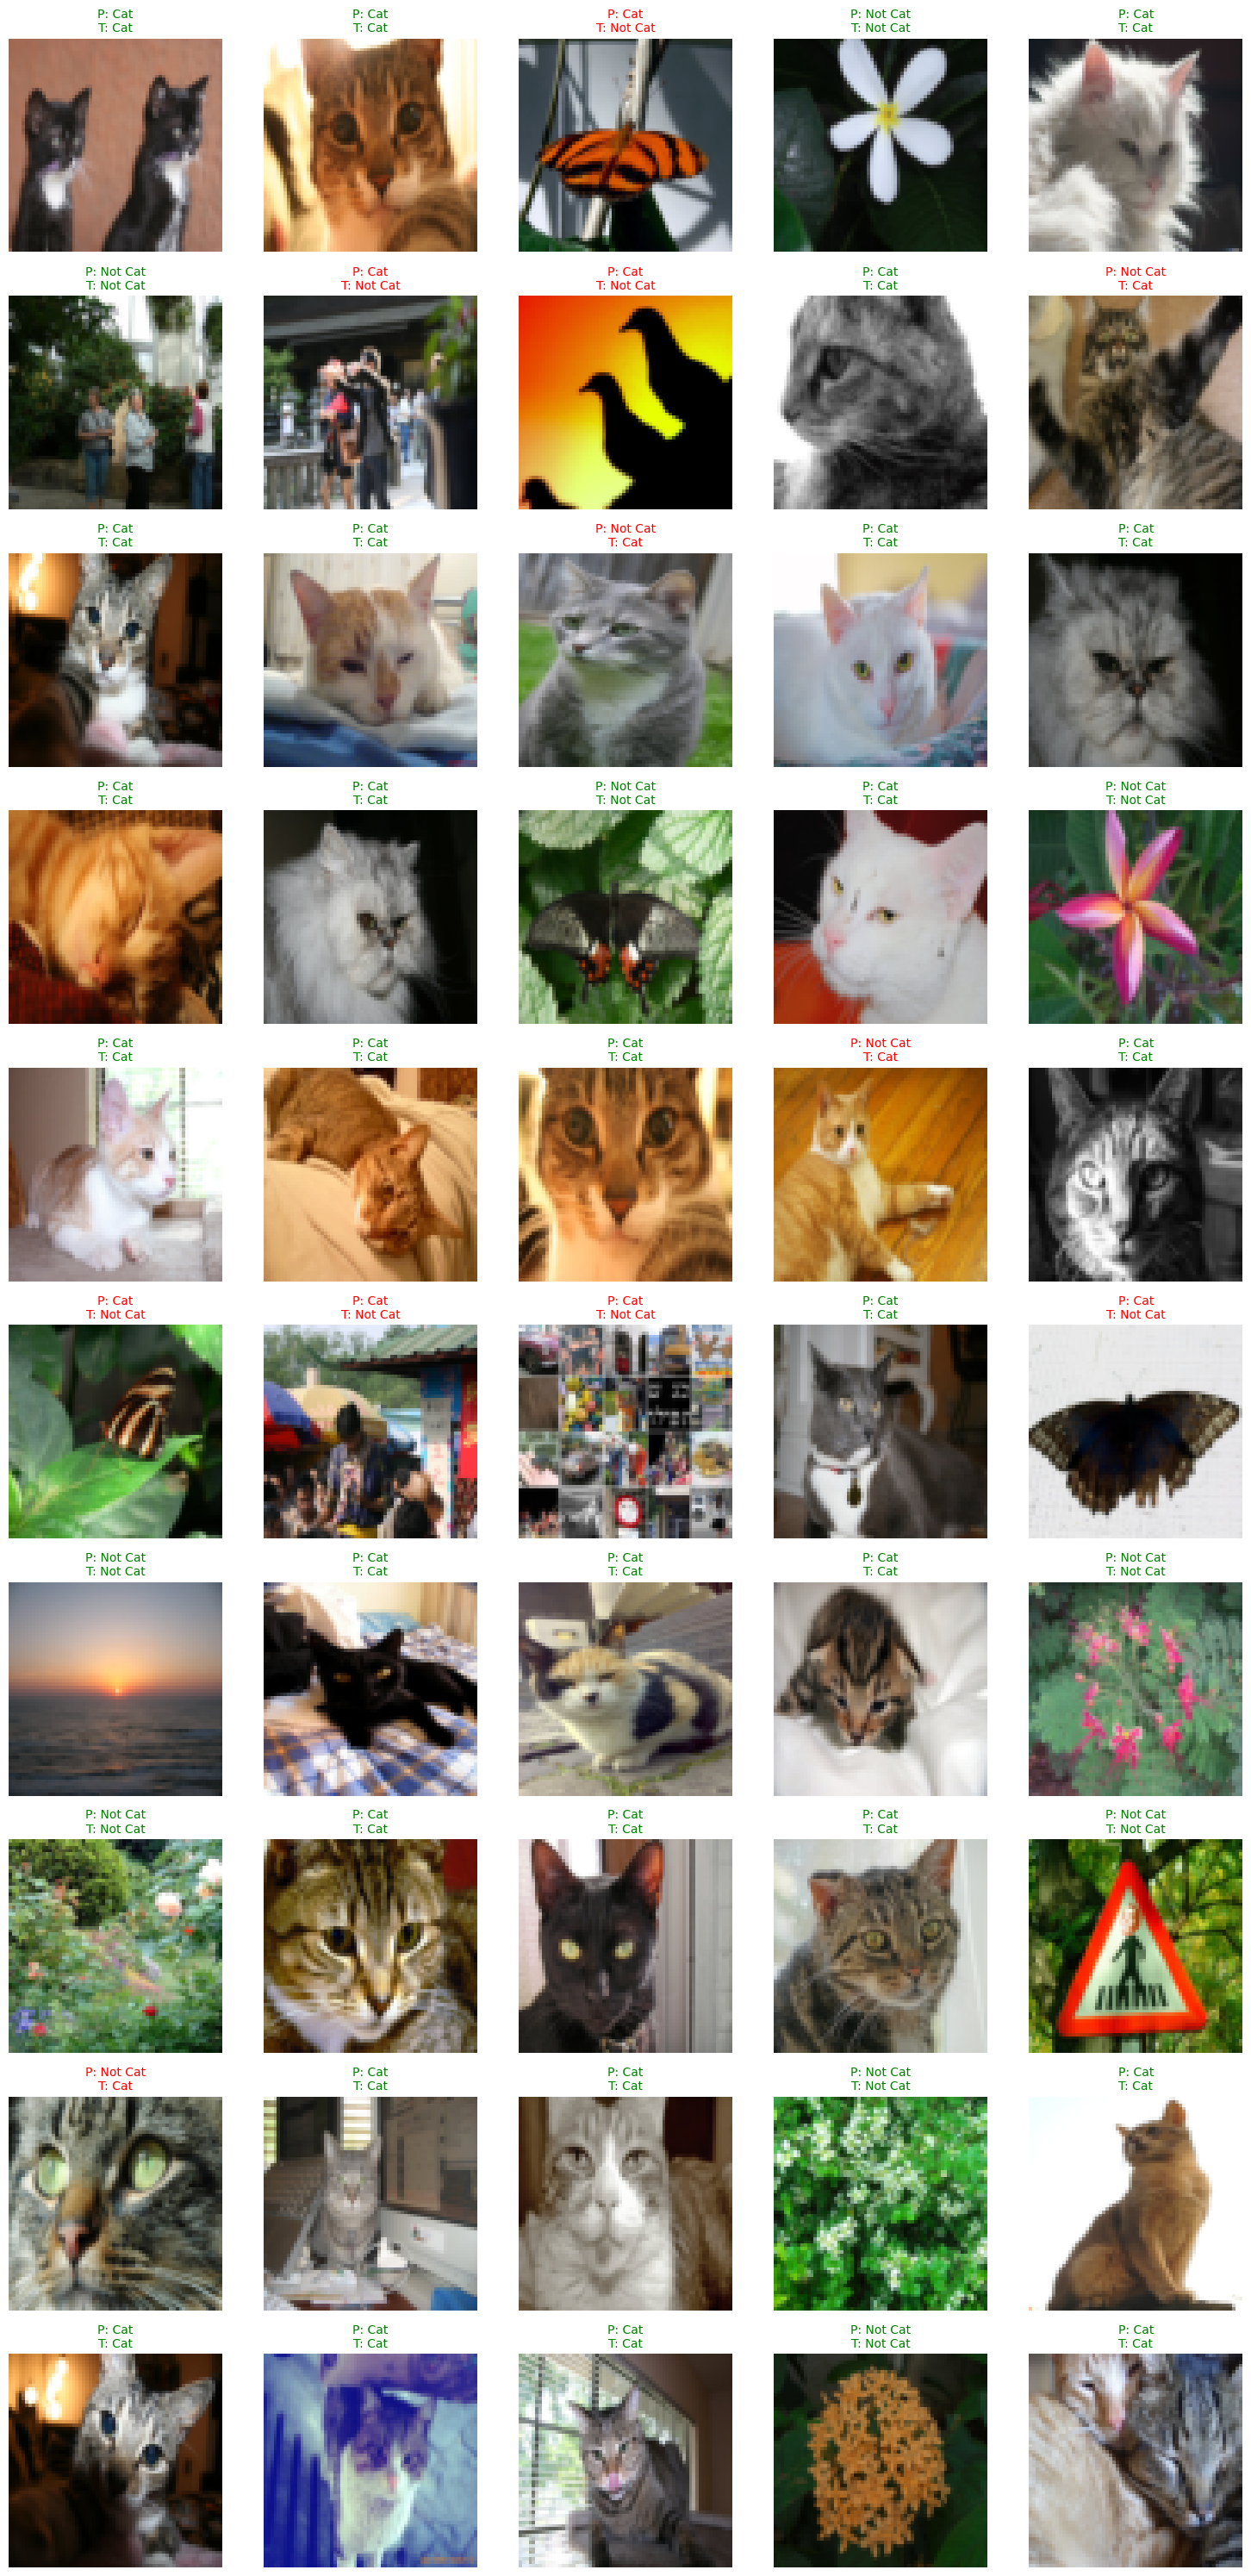

In [32]:
predicted_probs, predictions = predict(test_set_x, parameters)
print(test_set_x.shape)
print(test_set_y.shape)
# Display 10 random images and their predictions
print("Predicted probabilities:", predicted_probs[:, :50])  # Display probabilities for first 10 examples
display_predictions(test_set_x_orig, test_set_y, predictions)